# Stats 131 Final Project
by Will Jung, Iris Liu, Kellie Lue, Jean Rim 

## Part 1: Background Information

(insert info)

## Part 2.1: Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
MCresponses = pd.read_csv('multipleChoiceResponses.csv')
MCresponses.head()

C:\Users\Jean\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


This data needs a lot of cleaning because it is difficult to work with so many columns and obscure variable names.  
Therefore, we created a subset of the data.

### Subsetting Data

In [4]:
# Created a subset of the data based on interesting information
data = MCresponses.loc[:, ('Q1','Q2','Q3','Q4','Q5','Q6','Q8','Q9','Q10','Q12_MULTIPLE_CHOICE','Q23','Q24','Q26')]
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q9,Q10,Q12_MULTIPLE_CHOICE,Q23,Q24,Q26
0,What is your gender? - Selected Choice,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Does your current employer incorporate machine...,What is the primary tool that you use at work ...,Approximately what percent of your time at wor...,How long have you been writing code to analyze...,Do you consider yourself to be a data scientist?
1,Female,45-49,United States of America,Doctoral degree,Other,Consultant,NaN,NaN,I do not know,"Cloud-based data software & APIs (AWS, GCP, Az...",0% of my time,I have never written code but I want to learn,Maybe
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,5-10,"10-20,000",No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",1% to 25% of my time,I have never written code but I want to learn,Definitely not
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,0-1,"0-10,000",I do not know,Local or hosted development environments (RStu...,75% to 99% of my time,5-10 years,Definitely yes
4,Male,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,NaN,NaN,NaN,Local or hosted development environments (RStu...,50% to 74% of my time,5-10 years,Probably yes


In [5]:
print(data.loc[0,:]) # These column names are not clear
data.columns = ['gender','age','country','education','undergrad_major',
                'current_title','years_exp_curr_role','yearly_compensation',
                'employer_ml', 'primary_data_tool','percentage_time_spent_coding', 
                'coding_exp', 'data_scientist']

# Delete first row
data = data.drop([0], axis=0)
data.head()

Q1                                What is your gender? - Selected Choice
Q2                                           What is your age (# years)?
Q3                             In which country do you currently reside?
Q4                     What is the highest level of formal education ...
Q5                     Which best describes your undergraduate major?...
Q6                     Select the title most similar to your current ...
Q8                     How many years of experience do you have in yo...
Q9                     What is your current yearly compensation (appr...
Q10                    Does your current employer incorporate machine...
Q12_MULTIPLE_CHOICE    What is the primary tool that you use at work ...
Q23                    Approximately what percent of your time at wor...
Q24                    How long have you been writing code to analyze...
Q26                     Do you consider yourself to be a data scientist?
Name: 0, dtype: object


,gender,age,country,education,undergrad_major,current_title,years_exp_curr_role,yearly_compensation,employer_ml,primary_data_tool,percentage_time_spent_coding,coding_exp,data_scientist
1,Female,45-49,United States of America,Doctoral degree,Other,Consultant,NaN,NaN,I do not know,"Cloud-based data software & APIs (AWS, GCP, Az...",0% of my time,I have never written code but I want to learn,Maybe
2,Male,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,5-10,"10-20,000",No (we do not use ML methods),"Basic statistical software (Microsoft Excel, G...",1% to 25% of my time,I have never written code but I want to learn,Definitely not
3,Female,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,0-1,"0-10,000",I do not know,Local or hosted development environments (RStu...,75% to 99% of my time,5-10 years,Definitely yes
4,Male,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,NaN,NaN,NaN,Local or hosted development environments (RStu...,50% to 74% of my time,5-10 years,Probably yes
5,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,0-1,"0-10,000",I do not know,"Advanced statistical software (SPSS, SAS, etc.)",75% to 99% of my time,5-10 years,Maybe


### Dealing with NA

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23859 entries, 1 to 23859
Data columns (total 13 columns):
gender                          23859 non-null object
age                             23859 non-null object
country                         23859 non-null object
education                       23438 non-null object
undergrad_major                 22947 non-null object
current_title                   22900 non-null object
years_exp_curr_role             21101 non-null object
yearly_compensation             20185 non-null object
employer_ml                     20669 non-null object
primary_data_tool               19198 non-null object
percentage_time_spent_coding    18547 non-null object
coding_exp                      18533 non-null object
data_scientist                  18480 non-null object
dtypes: object(13)
memory usage: 2.5+ MB


The logic here was to check whether a 'default' bin already existed through `unique()` (e.g. "Other", "I prefer not to answer", etc.) and to put the NA's into that pre-existing bin.

In [7]:
data.education = data.education.fillna('I prefer not to answer')
data.undergrad_major = data.undergrad_major.fillna('Other')
data.current_title = data.current_title.fillna('Other')
data.data_scientist = data.data_scientist.fillna('Maybe')
data.employer_ml = data.employer_ml.fillna('I do not know')
data.primary_data_tool = data.primary_data_tool.fillna('Other')


data.years_exp_curr_role = data.years_exp_curr_role.fillna('0-1')
data.yearly_compensation = data.yearly_compensation.fillna('I do not wish to disclose my approximate yearly compensation')
data.coding_exp = data.coding_exp.fillna('I prefer not to answer')

#percentage_time_spent_coding realistically would have a new bin 'I do not know'
data.percentage_time_spent_coding = data.percentage_time_spent_coding.fillna('I do not know')

Some variables (years of experience at current role, yearly compensation, and coding experience) had various bin sizes, so we combined the smaller bins to make the bin size more uniform.

In [8]:
data.loc[(data['years_exp_curr_role'] == '0-1') | 
         (data['years_exp_curr_role'] == '1-2') | 
         (data['years_exp_curr_role'] == '2-3') | 
         (data['years_exp_curr_role'] == '3-4') |
         (data['years_exp_curr_role'] == '4-5'), 'years_exp_curr_role'] = '0-5'
data.loc[(data['yearly_compensation'] == '0-10,000') | 
        (data['yearly_compensation'] == '10-20,000') | 
        (data['yearly_compensation'] == '20-30,000') |
        (data['yearly_compensation'] == '30-40,000') |
        (data['yearly_compensation'] == '40-50,000'), 'yearly_compensation'] = '0-50,000'
data.loc[(data['yearly_compensation'] == '50-60,000') | 
        (data['yearly_compensation'] == '60-70,000') | 
        (data['yearly_compensation'] == '70-80,000') |
        (data['yearly_compensation'] == '80-90,000') |
        (data['yearly_compensation'] == '90-100,000'), 'yearly_compensation'] = '50-100,000'
data.loc[(data['yearly_compensation'] == '100-125,000') | 
        (data['yearly_compensation'] == '125-150,000'), 'yearly_compensation'] = '100-150,000'
data.loc[(data['coding_exp'] == 'I have never written code and I do not want to learn') |
        (data['coding_exp'] == 'I have never written code but I want to learn') | 
        (data['coding_exp'] == 'I prefer not to answer'), 'coding_exp'] = 'None'
data.loc[(data['coding_exp'] == '1-2 years') |
        (data['coding_exp'] == '3-5 years'), 'coding_exp'] = '1-5 years'

In [49]:
#check that there are no more NA's
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23859 entries, 1 to 23859
Data columns (total 13 columns):
gender                          23859 non-null object
age                             23859 non-null object
country                         23859 non-null object
education                       23859 non-null object
undergrad_major                 23859 non-null object
current_title                   23859 non-null object
years_exp_curr_role             23859 non-null object
yearly_compensation             23859 non-null object
employer_ml                     23859 non-null object
primary_data_tool               23859 non-null object
percentage_time_spent_coding    23859 non-null object
coding_exp                      23859 non-null object
data_scientist                  23859 non-null object
dtypes: object(13)
memory usage: 2.5+ MB


### Converting Variables to Int

In [9]:
# Part I
print(data.gender.unique())
new_gender = [0,1,2,2]

print(data.age.unique())
new_age = [47,32,37,23,27,19,42,57,65,52,80,75]

print(data.country.nunique())
new_country = np.arange(data.country.nunique()) #dummy variable

print(data.education.unique())
new_education = [4,1,2,3,0,0,0] #4 indicates doctoral, 3 is professional, 2 is masters, 1 is bachelors, 0 is other

print(data.undergrad_major.unique())
is_stem_major = [0,1,1,0,1,1,0,1,1,0,0,0, 0]

print(data.current_title.nunique())
new_title = np.arange(data.current_title.nunique()) # dummy variable

['Female' 'Male' 'Prefer not to say' 'Prefer to self-describe']
['45-49' '30-34' '35-39' '22-24' '25-29' '18-21' '40-44' '55-59' '60-69'
 '50-54' '80+' '70-79']
58
['Doctoral degree' 'Bachelor’s degree' 'Master’s degree'
 'Professional degree'
 'Some college/university study without earning a bachelor’s degree'
 'I prefer not to answer' 'No formal education past high school']
['Other' 'Engineering (non-computer focused)'
 'Computer science (software engineering, etc.)'
 'Social sciences (anthropology, psychology, sociology, etc.)'
 'Mathematics or statistics' 'Physics or astronomy'
 'Information technology, networking, or system administration'
 'A business discipline (accounting, economics, finance, etc.)'
 'Environmental science or geology'
 'Medical or life sciences (biology, chemistry, medicine, etc.)'
 'I never declared a major'
 'Humanities (history, literature, philosophy, etc.)'
 'Fine arts or performing arts']
21


In [10]:
# Part II
print(data.years_exp_curr_role.unique())
years = [3, 8, 13, 18, 23, 28, 33]

print(data.yearly_compensation.unique())
yearly = [25000, 25000, 75000, 125000, 175000, 225000, 275000, 350000, 450000, 500000]

print(data.employer_ml.unique())
employ = [0, 1, 2, 2, 3, 3]

print(data.primary_data_tool.unique())
primary = [0, 1, 2, 3, 4, 5]

print(data.percentage_time_spent_coding.unique())
percent = [0, 13, 88, 63, 38, 100, 50]

print(data.coding_exp.unique())
code = [3, 15, 25, 35, 40, 8, 1, 0]

print(data.data_scientist.unique())
science = [0, 1, 2, 0, 1]

['0-5' '5-10' '10-15' '15-20' '20-25' '25-30' '30 +']
['I do not wish to disclose my approximate yearly compensation' '0-50,000'
 '100-150,000' '50-100,000' '400-500,000' '150-200,000' '500,000+'
 '300-400,000' '200-250,000' '250-300,000']
['I do not know' 'No (we do not use ML methods)'
 'We are exploring ML methods (and may one day put a model into production)'
 'We recently started using ML methods (i.e., models in production for less than 2 years)'
 'We have well established ML methods (i.e., models in production for more than 2 years)'
 'We use ML methods for generating insights (but do not put working models into production)']
['Cloud-based data software & APIs (AWS, GCP, Azure, etc.)'
 'Basic statistical software (Microsoft Excel, Google Sheets, etc.)'
 'Local or hosted development environments (RStudio, JupyterLab, etc.)'
 'Advanced statistical software (SPSS, SAS, etc.)' 'Other'
 'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)']
['0% of my time' '1% to 25

In [11]:
cleanup = {"gender": dict(zip(data.gender.unique(), new_gender)),
           "age": dict(zip(data.age.unique(), new_age)),
           "country": dict(zip(data.country.unique(), new_country)),
           "education": dict(zip(data.education.unique(), new_education)),
           "undergrad_major": dict(zip(data.undergrad_major.unique(), is_stem_major)),
           "current_title": dict(zip(data.current_title.unique(), new_title)),
           "years_exp_curr_role": dict(zip(data.years_exp_curr_role.unique(), years)),
           "yearly_compensation": dict(zip(data.yearly_compensation.unique(), yearly)),
           "employer_ml": dict(zip(data.employer_ml.unique(), employ)),
           "primary_data_tool": dict(zip(data.primary_data_tool.unique(), primary)),
           "percentage_time_spent_coding": dict(zip(data.percentage_time_spent_coding.unique(), percent)),
           "coding_exp": dict(zip(data.coding_exp.unique(), code)),
           "data_scientist": dict(zip(data.data_scientist.unique(), science))}
temp = data.replace(cleanup)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23859 entries, 1 to 23859
Data columns (total 13 columns):
gender                          23859 non-null int64
age                             23859 non-null int64
country                         23859 non-null int64
education                       23859 non-null int64
undergrad_major                 23859 non-null int64
current_title                   23859 non-null int64
years_exp_curr_role             23859 non-null int64
yearly_compensation             23859 non-null int64
employer_ml                     23859 non-null int64
primary_data_tool               23859 non-null int64
percentage_time_spent_coding    23859 non-null int64
coding_exp                      23859 non-null int64
data_scientist                  23859 non-null int64
dtypes: int64(13)
memory usage: 2.5 MB


## Part 2.2: Exploratory Analysis

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

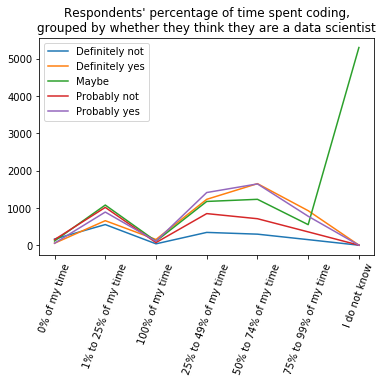

In [12]:
# Relationship between % time spent coding and whether they identified as a data scientist
table = data.groupby(['percentage_time_spent_coding', 'data_scientist']).gender.count().unstack()

plt.plot(table)
plt.title("Respondents' percentage of time spent coding,\ngrouped by whether they think they are a data scientist")
plt.legend(table)
plt.xticks(rotation = 70)

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

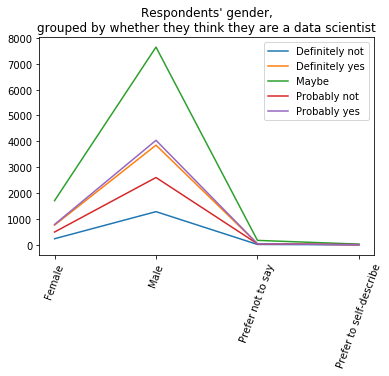

In [13]:
table = data.groupby(['gender', 'data_scientist']).gender.count().unstack()

plt.plot(table)
plt.title("Respondents' gender,\ngrouped by whether they think they are a data scientist")
plt.legend(table)
plt.xticks(rotation = 70)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

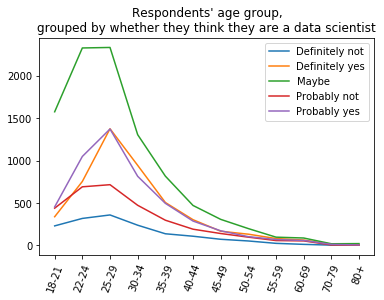

In [14]:
table = data.groupby(['age', 'data_scientist']).gender.count().unstack()

plt.plot(table)
plt.title("Respondents' age group,\ngrouped by whether they think they are a data scientist")
plt.legend(table)
plt.xticks(rotation = 70)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

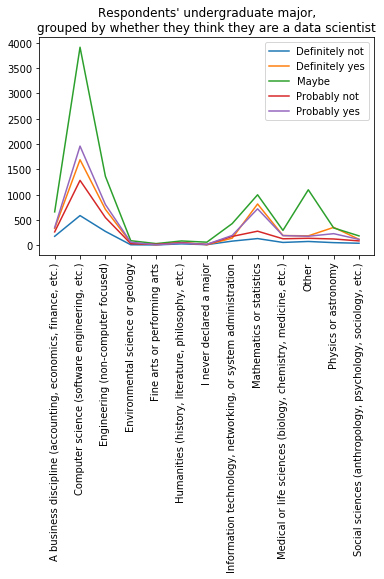

In [15]:
table = data.groupby(['undergrad_major', 'data_scientist']).gender.count().unstack()

plt.plot(table)
plt.title("Respondents' undergraduate major,\ngrouped by whether they think they are a data scientist")
plt.legend(table)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

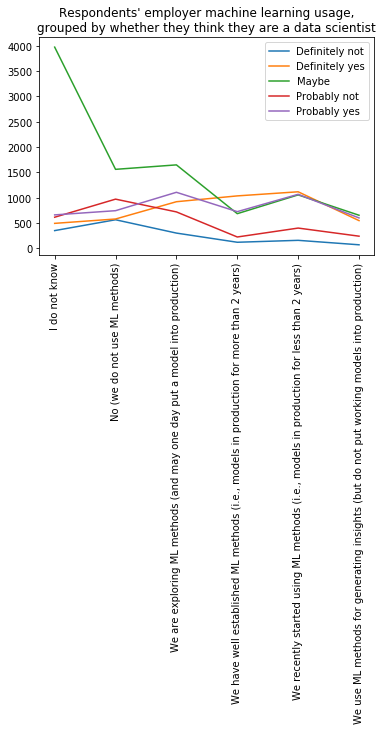

In [16]:
table = data.groupby(['employer_ml', 'data_scientist']).gender.count().unstack()

plt.plot(table)
plt.title("Respondents' employer machine learning usage,\ngrouped by whether they think they are a data scientist")
plt.legend(table)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

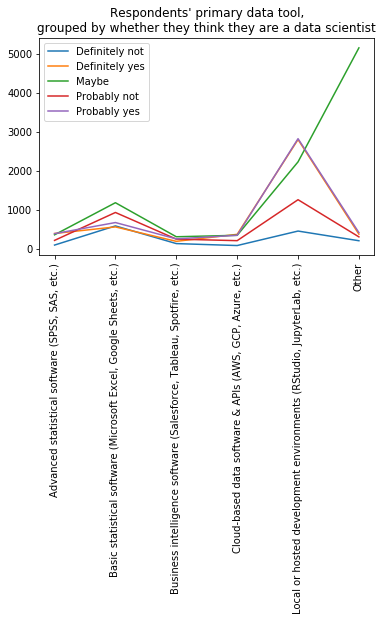

In [17]:
table = data.groupby(['primary_data_tool', 'data_scientist']).gender.count().unstack()

plt.plot(table)
plt.title("Respondents' primary data tool,\ngrouped by whether they think they are a data scientist")
plt.legend(table)
plt.xticks(rotation = 90)

# Logistic Modeling Using all of the Data Q26

In [59]:
from sklearn.linear_model import LogisticRegression
import random
from sklearn import metrics

In [60]:
X0 = temp.iloc[:, 0:11].values # Note - data that has all numeric variables is called 'temp'
y0 = temp.iloc[:, 12].values

In [61]:
random.seed(100)
model0 = LogisticRegression()
model0.fit(X0, y0)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
predicted = model0.predict(X0)
print(predicted[0:10])

[2 0 0 0 0 0 0 0 0 0]


In [63]:
print(metrics.accuracy_score(y0, predicted))

0.6044679156712351


The accuracy is 60.45% which is about the same as the accuracy when using the full data (prior to train/test split).

# Logistic Model With Most Significant Predictors Q26

In [64]:
X1 = temp.iloc[:, [0, 4, 5, 6, 7, 9, 10, 11]].values
y1 = temp.iloc[:, 12].values

In [65]:
random.seed(100)
model1 = LogisticRegression()
model1.fit(X1, y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
predicted = model1.predict(X1)
print(predicted[0:10])

[1 0 0 0 0 0 1 0 0 0]


In [67]:
from sklearn import metrics
print(metrics.accuracy_score(y1, predicted))

0.604551741481202


The accuracy is 60.46% which is about the same as the accuracy when using the full data.  It is slightly higher and uses less predictors.

# Logistic Model With Most Significant Predictors Q26 
## Training/Testing Split

In [68]:
X2 = temp.iloc[:, [0, 4, 5, 6, 7, 9, 10, 11]].values
y2 = temp.iloc[:, 12].values

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size = 0.3, random_state = 0)

In [70]:
random.seed(100)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
predicted = model2.predict(X_test)
print(predicted[0:10])

[0 0 0 0 0 0 0 0 0 0]


In [72]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, predicted))

0.6074322436434758


The accuracy is 60.74% which is about the same as the accuracy when using the full data prior to train/test split.

In [73]:
print(metrics.confusion_matrix(y_test, predicted))

[[3985  239  106]
 [1112  267   50]
 [1221   82   96]]


In [74]:
from sklearn.cross_validation import cross_val_score
import math
scores = cross_val_score(LogisticRegression(), X2, y2, scoring = 'accuracy', cv = 10)
print(scores)
print(scores.mean())

[0.57436112 0.54796816 0.56263092 0.55886049 0.55741827 0.62992456
 0.63312369 0.64444444 0.62976939 0.62709732]
0.5965598370268921


In this case, we can see that our mean accuracy score is about 59.66%, which is fairly consistent with the other models created.  All all of the models are within 1% of each other.